In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import plotnine as p9
%pylab inline
from Bio.Seq import Seq
import seaborn as sns
from scipy.stats.mstats import gmean
from adjustText import adjust_text

Populating the interactive namespace from numpy and matplotlib


In [2]:
genes_null_vs_wt = pd.read_csv("../result_count2_final/Null_vs_WT_merge.csv")
genes_het_vs_wt = pd.read_csv("../result_count2_final/Het_vs_WT_merge.csv")
genes_null_vs_het = pd.read_csv("../result_count2_final/Null_vs_Het_merge.csv")


/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 39 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


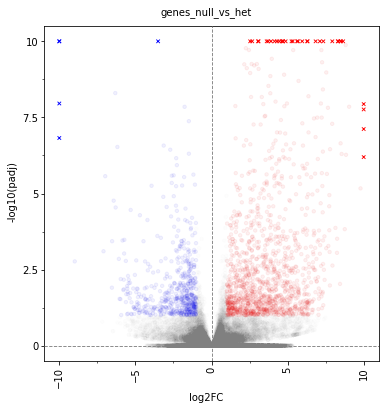

<ggplot: (8772832110681)>

In [8]:
# this cell is to make valcono plot of each df above
padj_sig = 0.1
# define df and name here:
df_use = genes_null_vs_het.copy()
name = 'genes_null_vs_het'
# fill padj na =1
df_use=df_use.fillna(1)
# transfer all genes padj as -log10(p)
all_genes = df_use.copy()
all_genes['padj'] = -log10(all_genes['padj'])

# plot all data as gray background:
# rename colnames for long
all_genes.columns=['ID','basemean','log2FC','lfcSE','stat','pvalue','padj']
df_all_genes_long = all_genes[['ID','log2FC','padj']]
# define up and down
df_all_genes_long.loc[df_all_genes_long['log2FC']>0,'change'] = 'up'
df_all_genes_long.loc[df_all_genes_long['log2FC']<0,'change'] = 'dn'

# set margin values all values > margin as margin
margin = 10
df_margin = df_all_genes_long.copy()
df_margin.loc[df_margin['log2FC']>= margin, 'log2FC']  = margin
df_margin.loc[df_margin['log2FC']<= - margin, 'log2FC']  = -margin
df_margin.loc[df_margin['padj']>= margin, 'padj']  = margin
df_margin.loc[df_margin['padj']<= - margin, 'padj']  = -margin
df_margin = df_margin.loc[(df_margin['log2FC']== margin)|
                          (df_margin['log2FC']== -margin) |
                          (df_margin['padj']== margin)|
                          (df_margin['padj']== -margin)]
# get the margin df:
df_margin
# get the all gene value for background plot:
df_all_genes_long

# pick genes having significant (<0.1) in at least ctr or cKO, which is log10p > 2
df_long_sig_group1 = df_all_genes_long[(df_all_genes_long['padj']>-log10(padj_sig)) &
                                       (df_all_genes_long['log2FC'].abs() > 1)]
                                        
plot = (
p9.ggplot()
    + p9.geom_point(data=df_all_genes_long,
           mapping=p9.aes(x='log2FC', y='padj'),color='gray',alpha=0.01)
    + p9.geom_point(data=df_long_sig_group1,
           mapping=p9.aes(x='log2FC', y='padj', color='change'),alpha=0.05)
    + p9.geom_point(data=df_margin,
           mapping=p9.aes(x='log2FC', y='padj', color = 'change'),shape='x')
    + p9.scale_color_manual(breaks = 'change',
                           values = ['blue','red'])
    + p9.theme(void)
    + p9.theme(axis_text_x = p9.element_text(angle=90))
    + p9.xlim(-margin,margin)
    + p9.ylim(0,margin)
    + p9.coord_fixed(ratio=2)
    + p9.geom_abline(intercept=0, slope=0, linetype = "dashed", color='gray')
    + p9.geom_vline(xintercept=0, linetype = "dashed", color='gray')
    + p9.ggtitle(name)
    + p9.ylab('-log10(padj)')
)
plot
# plot.save("../figures_final_count/" + name + "_log2_1_p_0p1.tiff", height=2, width=3,dpi=600)


In [9]:
df_long_sig_group1.groupby('change').count()

,ID,log2FC,padj
change,,,
dn,547,547,547
up,1245,1245,1245
